<a href="https://colab.research.google.com/github/u6k/ml-sandbox/blob/master/time_series_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Pythonで正規化・標準化（リスト、NumPy配列、pandas.DataFrame） | note.nkmk.me https://note.nkmk.me/python-list-ndarray-dataframe-normalize-standardize/

In [0]:
from google.colab import drive
drive.mount("/content/drive")

In [2]:
import pandas as pd

df = pd.read_csv("drive/My Drive/ml_data/stock_prices.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92833 entries, 0 to 92832
Data columns (total 9 columns):
id                  92833 non-null int64
ticker_symbol       92833 non-null int64
date                92833 non-null object
opening_price       92833 non-null int64
high_price          92833 non-null int64
low_price           92833 non-null int64
close_price         92833 non-null int64
turnover            92833 non-null int64
adjustment_value    92833 non-null int64
dtypes: int64(8), object(1)
memory usage: 6.4+ MB


,id,ticker_symbol,date,opening_price,high_price,low_price,close_price,turnover,adjustment_value
0,1,1301,2019-04-11 00:00:00,2821,2830,2789,2790,20500,2790
1,2,1301,2019-04-10 00:00:00,2751,2845,2732,2832,59200,2832
2,3,1301,2019-04-09 00:00:00,2759,2768,2748,2768,24700,2768
3,4,1301,2019-04-05 00:00:00,2763,2789,2759,2771,23400,2771
4,5,1301,2019-04-04 00:00:00,2793,2801,2766,2770,32700,2770


In [3]:
df_1301 = df[df.ticker_symbol == 1301]
df_1301.index = df_1301.date
df_1301 = df_1301.sort_index()
df_1301 = df_1301[["opening_price",
                   "high_price",
                   "low_price",
                   "close_price",
                   "adjustment_value"]]

df_1301.info()
df_1301


<class 'pandas.core.frame.DataFrame'>
Index: 9125 entries, 1983-01-04 00:00:00 to 2019-04-12 00:00:00
Data columns (total 5 columns):
opening_price       9125 non-null int64
high_price          9125 non-null int64
low_price           9125 non-null int64
close_price         9125 non-null int64
adjustment_value    9125 non-null int64
dtypes: int64(5)
memory usage: 427.7+ KB


,opening_price,high_price,low_price,close_price,adjustment_value
date,,,,,
1983-01-04 00:00:00,144,144,140,141,1410
1983-01-05 00:00:00,144,155,142,153,1530
1983-01-06 00:00:00,162,168,157,160,1600
1983-01-07 00:00:00,160,162,155,155,1550
1983-01-08 00:00:00,157,158,152,152,1520
1983-01-10 00:00:00,155,155,151,153,1530
1983-01-11 00:00:00,156,164,153,164,1640
1983-01-12 00:00:00,164,164,160,160,1600
1983-01-13 00:00:00,160,161,158,158,1580


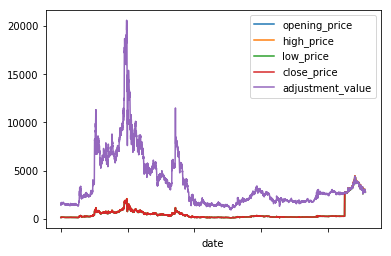

In [4]:
df_1301.plot()

In [5]:
import numpy as np
from sklearn import preprocessing

adjustment_values = np.array(df_1301["adjustment_value"].astype("float32"))
df_1301["scaled_adjustment_value"] = preprocessing.minmax_scale(adjustment_values)

df_1301

,opening_price,high_price,low_price,close_price,adjustment_value,scaled_adjustment_value
date,,,,,,
1983-01-04 00:00:00,144,144,140,141,1410,0.023410
1983-01-05 00:00:00,144,155,142,153,1530,0.029517
1983-01-06 00:00:00,162,168,157,160,1600,0.033079
1983-01-07 00:00:00,160,162,155,155,1550,0.030534
1983-01-08 00:00:00,157,158,152,152,1520,0.029008
1983-01-10 00:00:00,155,155,151,153,1530,0.029517
1983-01-11 00:00:00,156,164,153,164,1640,0.035115
1983-01-12 00:00:00,164,164,160,160,1600,0.033079
1983-01-13 00:00:00,160,161,158,158,1580,0.032061


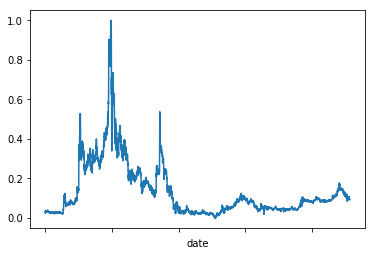

In [6]:
df_1301["scaled_adjustment_value"].plot()

In [0]:
# 60日のデータを使い、61日目を予測する

scaled_adjustment_values = np.array(df_1301["scaled_adjustment_value"].astype("float32"))

x, y = [], []
length = 60

for i in range(len(scaled_adjustment_values) - length):
  x.append(scaled_adjustment_values[i:i+length])
  y.append(scaled_adjustment_values[i+length])

data = np.array(x).reshape(len(x), length, 1)
target = np.array(y).reshape(len(y), 1)

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

length_of_sequence = 60
in_out_neurons = 1
n_hidden = 300

batch_size = 1024
epoch = 100

model = Sequential()
model.add(LSTM(n_hidden,
               batch_input_shape=(None, length_of_sequence, in_out_neurons),
               return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer=Adam(lr=0.001))

history = model.fit(data,
                    target,
                    batch_size=batch_size,
                    epochs=epoch,
                    validation_split=0.2,
                    callbacks=[EarlyStopping()])

Train on 7252 samples, validate on 1813 samples
Epoch 1/100
7252/7252 [==============================] - 2s 304us/step - loss: 0.0166 - val_loss: 1.4102e-04
Epoch 2/100
7252/7252 [==============================] - 1s 138us/step - loss: 0.0025 - val_loss: 4.1286e-04


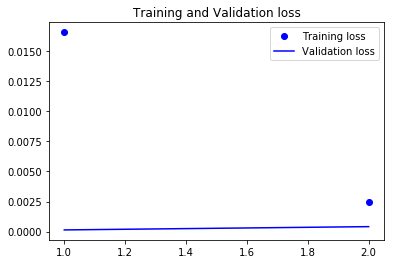

In [14]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [23]:
future_result = []

for idx, test_data in enumerate(x):
  future_test = np.reshape(test_data, (1, 60, 1))
  result = model.predict(future_test)
  future_result.append(result[0][0])
  
  if idx % 100 == 0:
    print("{0}/{1}".format(idx, len(x)))

future_result

0/9065
100/9065
200/9065
300/9065
400/9065
500/9065
600/9065
700/9065
800/9065
900/9065
1000/9065
1100/9065
1200/9065
1300/9065
1400/9065
1500/9065
1600/9065
1700/9065
1800/9065
1900/9065
2000/9065
2100/9065
2200/9065
2300/9065
2400/9065
2500/9065
2600/9065
2700/9065
2800/9065
2900/9065
3000/9065
3100/9065
3200/9065
3300/9065
3400/9065
3500/9065
3600/9065
3700/9065
3800/9065
3900/9065
4000/9065
4100/9065
4200/9065
4300/9065
4400/9065
4500/9065
4600/9065
4700/9065
4800/9065
4900/9065
5000/9065
5100/9065
5200/9065
5300/9065
5400/9065
5500/9065
5600/9065
5700/9065
5800/9065
5900/9065
6000/9065
6100/9065
6200/9065
6300/9065
6400/9065
6500/9065
6600/9065
6700/9065
6800/9065
6900/9065
7000/9065
7100/9065
7200/9065
7300/9065
7400/9065
7500/9065
7600/9065
7700/9065
7800/9065
7900/9065
8000/9065
8100/9065
8200/9065
8300/9065
8400/9065
8500/9065
8600/9065
8700/9065
8800/9065
8900/9065
9000/9065


[0.052913584,
 0.052862022,
 0.052690104,
 0.052435685,
 0.05225428,
 0.052233327,
 0.05223314,
 0.052443836,
 0.052892655,
 0.053556576,
 0.054371975,
 0.055208813,
 0.055840097,
 0.05625313,
 0.05657982,
 0.056798078,
 0.056935906,
 0.057016727,
 0.05705903,
 0.057060767,
 0.05701008,
 0.05695135,
 0.05692466,
 0.056935202,
 0.056964513,
 0.0569413,
 0.05687469,
 0.05669567,
 0.05636472,
 0.056009393,
 0.055705883,
 0.055504892,
 0.055334263,
 0.055134032,
 0.054826688,
 0.054412067,
 0.05397365,
 0.053501908,
 0.053039145,
 0.052609935,
 0.05225363,
 0.051972736,
 0.051820524,
 0.0517224,
 0.051602222,
 0.051479768,
 0.05136665,
 0.05125271,
 0.05111801,
 0.05090377,
 0.05051244,
 0.050073206,
 0.049678203,
 0.049344998,
 0.04904557,
 0.048731934,
 0.048406973,
 0.04802869,
 0.047640555,
 0.047312886,
 0.047065366,
 0.046915874,
 0.0468349,
 0.046783317,
 0.04670593,
 0.046590015,
 0.046446558,
 0.046286073,
 0.04614498,
 0.045997363,
 0.045859467,
 0.045739613,
 0.045592982,
 0.045

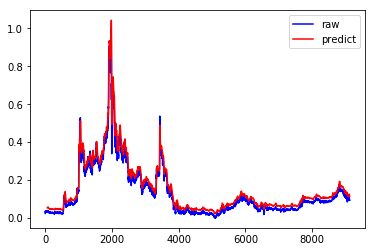

In [27]:
plt.figure()
plt.plot(range(0, len(scaled_adjustment_values)),
         scaled_adjustment_values,
         color="b",
         label="raw")
plt.plot(range(60, len(future_result)+60),
         future_result,
         color="r",
         label="predict")
plt.legend()
plt.show()